In [93]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special as sp

# Entropy in random walk of analog bits

In [94]:
def entropy_analog(sigma):
    x=1/sigma
    p_0=(sp.erf(x)+1)/2
    p_1=1-p_0
    return -p_0*np.log2(p_0+1e-10)-p_1*np.log2(p_1+1e-10)


def gaussian(x,mu,sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))/(sigma*np.sqrt(2*np.pi))

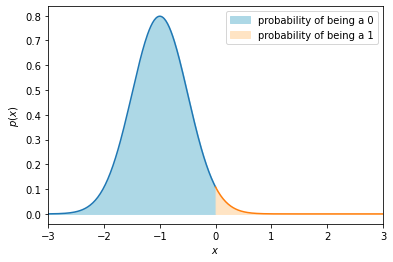

In [95]:
sigma=0.5

xl=np.linspace(-3,0,200)
yl=gaussian(xl,-1,sigma)

xr=np.linspace(0,3,200)
yr=gaussian(xr,-1,sigma)

plt.xlim(-3,3)
plt.plot(xl,yl)
plt.plot(xr,yr)
plt.fill_between(xl,yl,color='lightblue',label='probability of being a 0')
plt.fill_between(xr,yr,color='bisque',label='probability of being a 1')

plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend()

### Entropy as a function of total noise

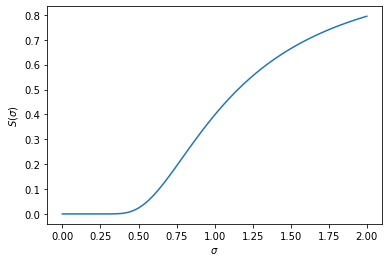

In [96]:
sigmas=np.linspace(0,2,100)+1e-8
y=entropy_analog(sigmas)
plt.ylabel('$S(\sigma)$')
plt.xlabel('$\sigma$')
plt.plot(sigmas,y)
plt.show()

### Entropy as a function of number of steps

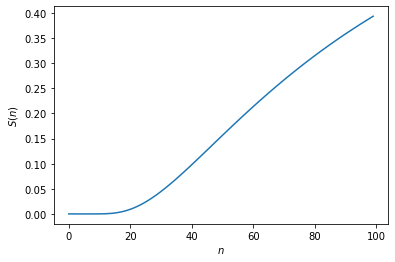

In [97]:
n=np.arange(0,100) #number of steps
sigma=0.1
sigmas=np.sqrt(n)*sigma+1e-8


y=entropy_analog(sigmas)

plt.ylabel('$S(n)$')
plt.xlabel('$n$')
plt.plot(n,y)
plt.show()

The graph above shows that the data points must have high noise in order to become non-trivial to solve. The model can only learn anything meaningful if there is an increase in entropy

# Entropy in random walk of qbits

The wavefunciton of a simple qbit without complex phase can be written as

$\psi(\theta)=\begin{vmatrix}\cos(\theta)\\\sin(\theta)\end{vmatrix}$

Suppose that the $\theta$ angle has a gaussian probability density 

$P(\theta;\theta_0,\sigma)=\frac 1{\sigma\sqrt{2\pi}}e^{-\frac {(\theta-\theta_0)^2}{2\sigma^2}}$

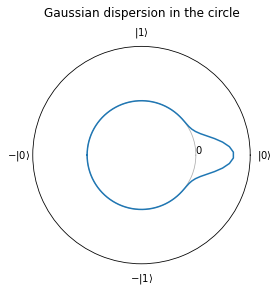

In [134]:
theta = np.linspace(-np.pi,np.pi, 100)
sigma=0.2
gaussian_max=gaussian(0,0,sigma)/.7
r=gaussian(theta,0,sigma)/gaussian_max+1

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2])
ax.set_xticklabels(["$|0\\rangle$","$|1\\rangle$","$-|0\\rangle$","$-|1\\rangle$"])
ax.set_yticks([1])
ax.set_yticklabels([0])

ax.set_rlabel_position(0)  # Move radial labels away from plotted line
ax.grid(axis='x')

ax.set_title("Gaussian dispersion in the circle", va='bottom')
plt.show()

If you know the angle $\theta$ the probability of being in the $|i\rangle$ state is  $p_i(\theta)= |\langle i|\psi(\theta)\rangle|^2$

which means that

$p_0(\theta)=\cos^2(\theta)$

$p_1(\theta)=\sin^2(\theta)$

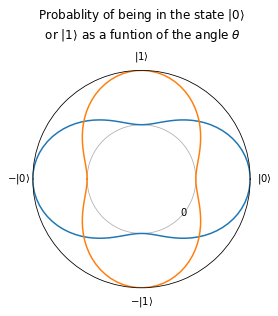

In [133]:
theta = np.linspace(-np.pi,np.pi, 100)

r0=np.cos(theta)**2+1
r1=np.sin(theta)**2+1

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r0)
ax.plot(theta, r1)
ax.set_rmax(2)
ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2])
ax.set_xticklabels(["$|0\\rangle$","$|1\\rangle$","$-|0\\rangle$","$-|1\\rangle$"])
ax.set_yticks([1])
ax.set_yticklabels([0])

ax.set_rlabel_position(-45)  # Move radial labels away from plotted line
ax.grid(axis='x')

ax.set_title("Probablity of being in the state $|0\\rangle$\n or $|1\\rangle$ as a funtion of the angle $\\theta$", va='bottom')
plt.show()

Then probability of being in the state $|i\rangle$ with $i\in \{0,1\}$ is 

$p_i=\int_{-\infty}^{+\infty}|\langle i|\psi(\theta)\rangle|^2P(\theta;\theta_0,\sigma)d\theta$

If we start at the state $|0\rangle$ and add a gaussian noise, the probability of actually being in the same state is

$p_0=\frac 1{\sigma \sqrt{2\pi}}\int^{+\infty}_{-\infty}\cos^2(\theta)e^{-\frac {\theta^2}{2\sigma^2}}d\theta $

This can be integrated analytically, and it is equal to

$p_0=\frac{e^{-2\sigma^2}+1}2,\quad p_1=\frac{e^{-2\sigma^2}-1}2$

The entropy formula is

$S=p_0\log_2(p_0)+p_1\log_2(p_1)$

and for small $\sigma$ (aka. small noise) the entropy formula can be approximated by

$S=-\sigma^2\log_2\sigma^2$

In [52]:
def probability_quantum(sigma):
    return (1+np.e**(-2*sigma**2))/2

def entropy_quantum(sigma):
    p_0=probability_quantum(sigma)
    p_1=1-p_0
    return -p_0*np.log2(p_0)-p_1*np.log2(p_1)

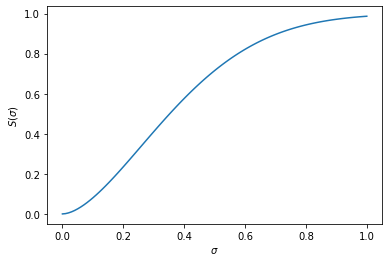

In [57]:
sigmas=np.linspace(0,1,100)+1e-8
y=entropy_quantum(sigmas)
plt.ylabel('$S(\sigma)$')
plt.xlabel('$\sigma$')
plt.plot(sigmas,y)
plt.show()

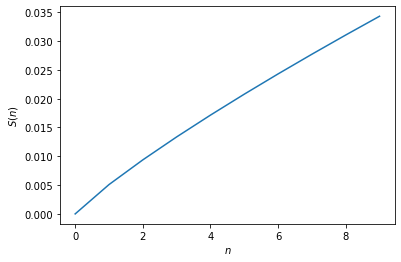

In [75]:
n=np.arange(0,10) #number of steps
sigmas=np.sqrt(n)*.02+1e-8


y=entropy_quantum(sigmas)
plt.ylabel('$S(n)$')
plt.xlabel('$n$')
plt.plot(n,y)
plt.show()

$p_0=\frac 1{\sigma \sqrt{2\pi}}\int^{+\infty}_{-\infty}\cos^2(\theta)e^{-\frac {\theta^2}{2\sigma^2}}d\theta $

$p_0=\frac 1{\sqrt{\pi}}\int^{+\infty}_{-\infty}\cos^2(z\sigma\sqrt 2) e^{-z^2}dz $

$p_0=\frac 1{\sqrt{\pi}}\int^{+\infty}_{-\infty}(1+2z^2\sigma^2) e^{-z^2}dz $

$p_0=1 -\frac{2}{\sqrt{\pi}}\sigma^2\int^{+\infty}_{-\infty}z^2e^{-z^2}dz $

$p_0=1 -\sigma^2$

$S=(1-\sigma^2)\log_2(1-\sigma^2) - \sigma^2\log_2\sigma^2$

$S=-\sigma^2 - \sigma^2\log_2\sigma^2$

$S=-\sigma^2(1+\log_2\sigma^2)$

$S=-\sigma^2\log_2\sigma^2$

In [50]:
def entropy_low_sigma(x):
    return -x**2 * np.log(x**2)

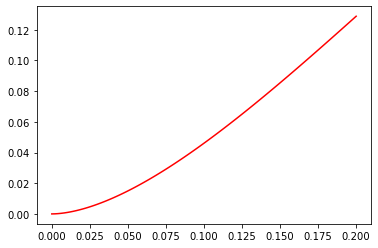

In [51]:
x=np.linspace(0,0.2,100)+1e-8
y=entropy_low_sigma(x)
plt.plot(x,y)

/var/folders/vg/h6knjndn79l9ytz887vfbrcm0000gn/T/ipykernel_80548/3902215871.py:13: RuntimeWarning: divide by zero encountered in log2
  return -p_0*np.log2(p_0)-p_1*np.log2(p_1)
/var/folders/vg/h6knjndn79l9ytz887vfbrcm0000gn/T/ipykernel_80548/3902215871.py:13: RuntimeWarning: invalid value encountered in multiply
  return -p_0*np.log2(p_0)-p_1*np.log2(p_1)


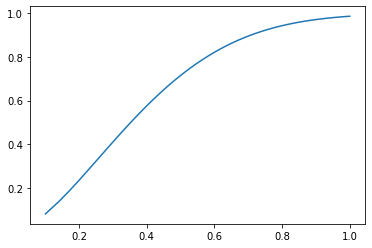

In [13]:
def entropy_images(sigma):
    return 3/2*np.log2(2*np.pi*sigma**2)

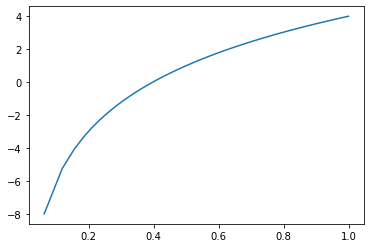

In [19]:
x=np.sqrt(np.linspace(1/255,1,100))
y=entropy_images(x)
plt.plot(x,y)